In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract as tes

from PIL import Image, ImageEnhance, ImageOps, ImageFilter, ImageChops

In [ ]:
# screenshot command
# adb -s 192.168.10.2 exec-out screencap -p > s.png

['', '', '', '', '20:22', '@', '€e', '24°', 'OHO', 'WA', '82%G', '', 'POKEMON', '', 'Q', '(57)', '', '<', 'OM', 'Mic', 'MEW', 'nt)', '', 'ceP457', '(et', 'uKov/', '(eed', 'CW', '', ',', '4', '', 'o', 'y', '.', '', '®', 'Ducklett', '®', 'Gulpin', '®', 'Wurmple', '', 'ar', 'be]', 'ce551', 'rm', '0)', '0)', '', 'oe', 'age', 'y', '', '®', 'Magnemite', 'SEY', 'eiics', 'oe', 'TUT', 'alacetl', 'ey', '', 'ce', '195', 'at', '5', '$0}', 'ce', '56', '', 'ry', 'ra', 'dp', '', 'B=', 'i(efere', 'SNe]', 'Teal', 'teid', '', 'cs', 'HA', 'ce', '784', 'aoe', '1', '072)', '', 'Sastre', 'eyg', 'eta', 'Cela', '', '9', '@', '', '4', '»', 'rt']


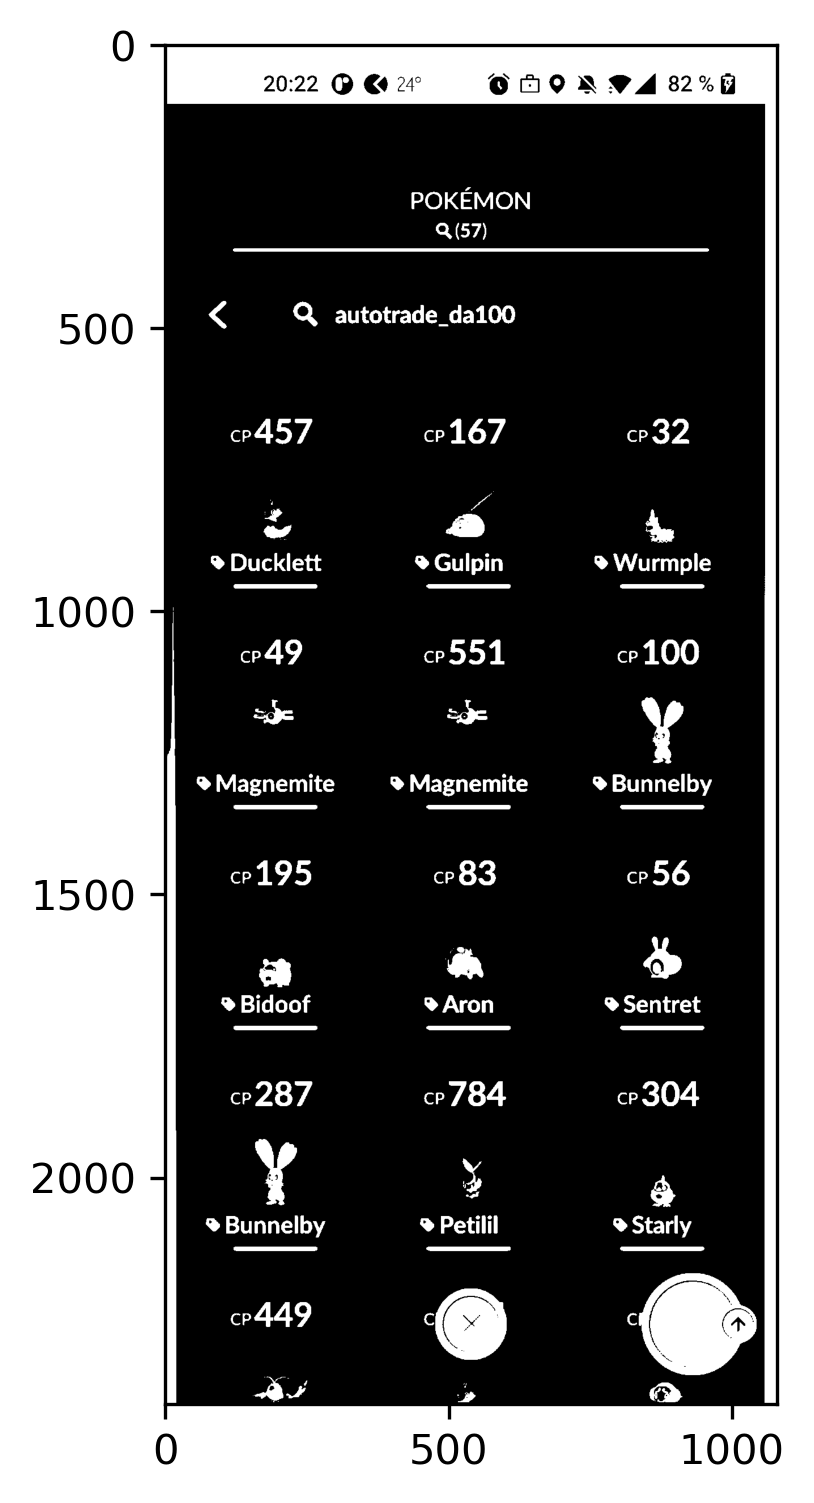

In [7]:
im = cv2.imread('s.png')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im_edges = cv2.Canny(im_gray,100,200)

# im_bin = np.all(np.array(im_gray < 100, dtype=np.bool), axis=2)
_, im_thresh = cv2.threshold(im_gray, 200,255, cv2.THRESH_BINARY_INV)

im = im_thresh


#im_pil = Image.fromarray(im)
#enhancer = ImageEnhance.Contrast(im_pil)
#im = enhancer.enhance(2)
#im = im.convert('L')
#im = ImageOps.invert(im)
#im = im.point(lambda x: 0 if x < 100 else 255)
#im = im.filter(ImageFilter.SMOOTH_MORE)
#im = np.asarray(im)


#plt.subplot(121),plt.imshow(img,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

ocr = tes.image_to_data(im, output_type=tes.Output.DICT, lang='eng', config='--psm 6')
text_list = ocr['text']
print(text_list)

im_out = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6), dpi=300)
plt.imshow(im_out)
plt.show()

In [12]:
import re
text_string = ''.join(text_list)
print(text_string)
for text in text_list:
    regex_pattern = re.compile(r'^c(e|p)p?\d{0,4}?', re.IGNORECASE)
    print(f'{text}: {bool(regex_pattern.match(text))}')

22:38&Sd100%©©POKEMON©Q(35)<Q‘legendary&!mythical&!shiny&!4*&!4xceP453cpP470ceP454GibleGibleGiblece474ceP452ceP445GibleGibleGiblecp07cP616cp2/5ye4PonytaGibleSwirlixcP998cP568ce1001@24Swirlix©@oe718ce574e919
: False
: False
: False
: False
22:38: False
&: False
Sd: False
100%: False
: False
©: False
©: False
: False
POKEMON: False
©: False
: False
Q: False
(35): False
: False
<: False
Q: False
‘legendary&!mythical&!shiny&!4*&!: False
4x: False
: False
ceP453: True
cpP470: True
ceP454: True
: False
Gible: False
Gible: False
Gible: False
: False
ce474: True
ceP452: True
ceP445: True
: False
Gible: False
Gible: False
Gible: False
: False
cp: True
07: False
cP616: True
cp2/5: True
: False
ye: False
4: False
: False
Ponyta: False
Gible: False
Swirlix: False
: False
cP998: True
cP: True
568: False
ce: True
1001: False
: False
@: False
2: False
4: False
: False
Swirlix: False
©: False
@: False
: False
oe: False
718: False
ce: True
574: False
e919: False


In [20]:
import re

x = bool(re.search(r'POKEMON.{1}?Q', text_string))
print(x)

True
